In [ ]:
# read in some helpful libraries
import nltk # the natural langauage toolkit, open-source NLP
import pandas as pd # dataframes
import numpy as np 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from collections import Counter

# initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

### Read our train data into a dataframe
texts = pd.read_csv("raw_data/train_full.csv", encoding = 'latin-1')

In [3]:
# split the data by author
byAuthor = texts.groupby("author")

# how many sentences are from each author?
for name, group in byAuthor:
        print(len(group['text']))

7900
5635
6044


In [4]:
# create df for each author
eap = texts.loc[texts['author'] == 'EAP']
hpl = texts.loc[texts['author'] == 'HPL']
mws = texts.loc[texts['author'] == 'MWS']

# randomly subset the larger author dfs so that each df has the same number of sentences
eap_s = eap.sample(n=5635)
mws_s = mws.sample(n=5635)

# combine subsetted dfs into single df
texts_s = pd.concat([eap_s, hpl, mws_s])

In [8]:
# split the data by author
byAuthor = texts_s.groupby("author")

# create empty dictionary to store combined sentences for each author
sentence_dict = {}

# create empty dictionary to store tokenized sentences for each author
token_dict = {}

# for each author...
for name, group in byAuthor:
    # get all of the sentences they wrote and collapse them into a
    # single long string
    sentences = group['text'].str.cat(sep = ' ')
    
    # convert everything to lower case (so "The" and "the" get counted as 
    # the same word rather than two different words)
    sentences = sentences.lower()
    
    sentence_dict[name] = (sentences)
    
    # split the text into individual tokens (words)  
    tokens = nltk.tokenize.word_tokenize(sentences)
    
    token_dict[name] = (tokens)

In [9]:
# create empty dictionary to store the number of unique words used by each author
vocabulary = {}

# for each author
for key, value in token_dict.items():
    unique_words = set(value)
    len_unique_words = len(unique_words)
    vocabulary[key] = (len_unique_words)
    
#vocabulary_df = pd.DataFrame(vocabulary)
#vocabulary_df
vocabulary

{'EAP': 13323, 'HPL': 14552, 'MWS': 11253}

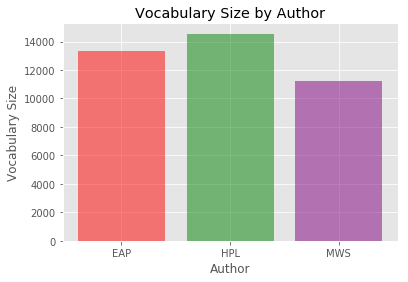

In [10]:
# plot
plt.bar(np.arange(3), vocabulary.values(), color = ['red', 'green', 'purple'], alpha = 0.5)
plt.xticks(np.arange(3), vocabulary.keys())
plt.title("Vocabulary Size by Author")
plt.xlabel("Author")
plt.ylabel("Vocabulary Size")
plt.show()

In [ ]:
from scipy import stats
 
F, p = stats.f_oneway(vocabulary['ctrl'], d_data['trt1'], d_data['trt2'])